In [1]:
from bda.utils import MH_MCMC_uniform_independence_sampling, mcmc_trace, mcmc_hist, mcmc_dens, plot_beta_binomial, neff_ratio, mcmc_acf, rhat
import scipy.stats as stats

# 7.5 A Beta-Binomial example

Beta-Binomial Beispiel um den Metropolis-Hastings Algorithmus zu testen bei welchem $Y = 1$ Hits in 2 Versuchen:

$$
\begin{array}{rl}
Y \mid \pi &\sim \mathrm{Binomial}(2,\pi), \\[6pt]
\pi &\sim \mathrm{Beta}(2,3) \\[6pt]
\Rightarrow &\pi \mid (Y=1) \sim \mathrm{Beta}(3,4).
\end{array}
$$


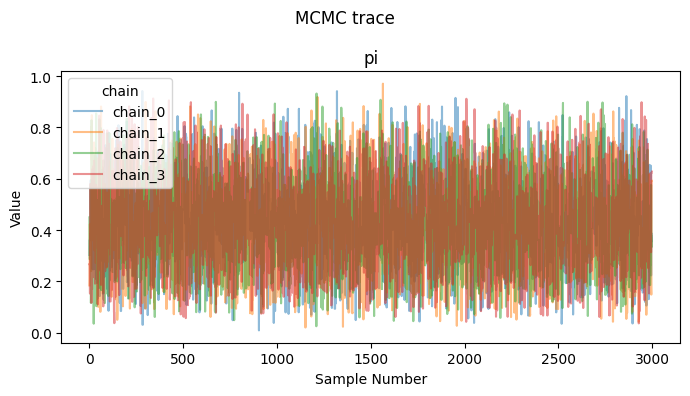

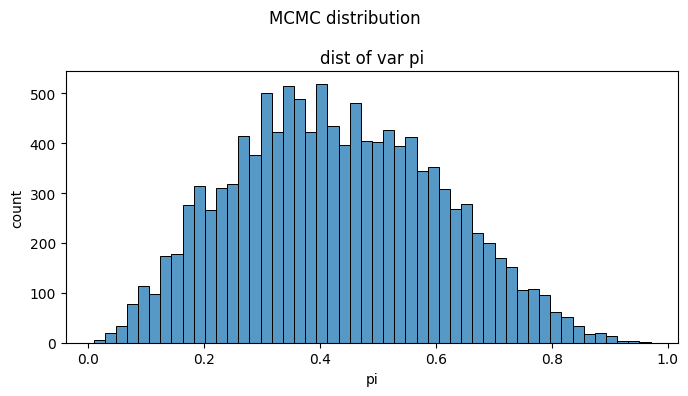

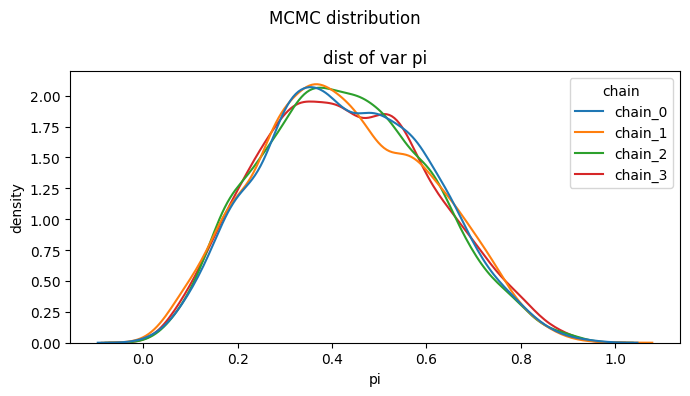

In [2]:
y = 1
n = 2

def prior_mul_likelihood(pi:float):
    return stats.beta.pdf(pi, 2, 3) * stats.binom.pmf(y, n, pi)

# independence sampling MCMC kann genutzt werden: proposal network ist nicht abhängig von current location
results = MH_MCMC_uniform_independence_sampling(prior_mul_likelihood, min_max=(0, 1), num_iterations=3000)
mcmc_trace(results)
mcmc_hist(results)
mcmc_dens(results)

,n_samples,n_chains,ess,ess_ratio
var_name,,,,
pi,3000,4,11276.24295,0.939687


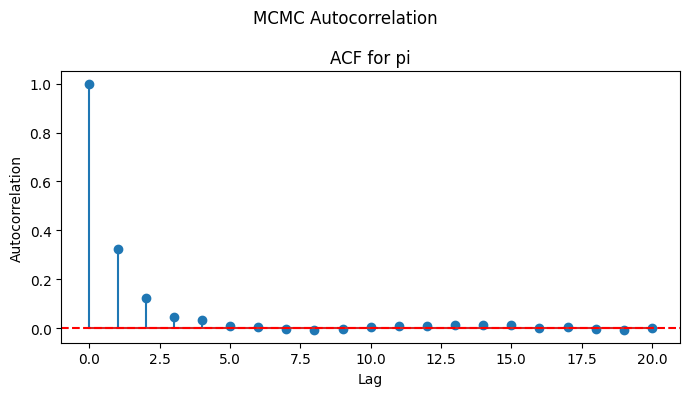

,rhat,n_chains
var_name,,
pi,0.999962,4


In [3]:
display(neff_ratio(results))
mcmc_acf(results)
display(rhat(results))

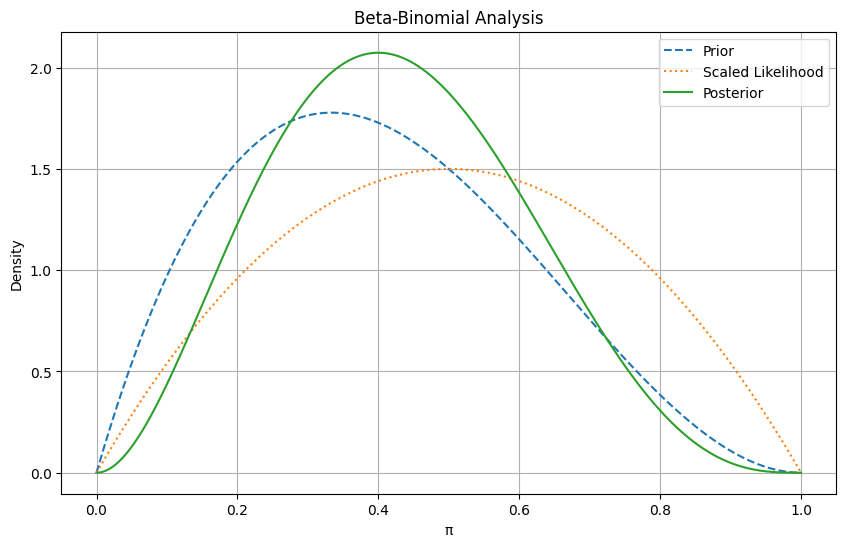

In [4]:
plot_beta_binomial(2, 3, 2, 1)